In [ ]:
Pragiymook Jeerakom 6204101329

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


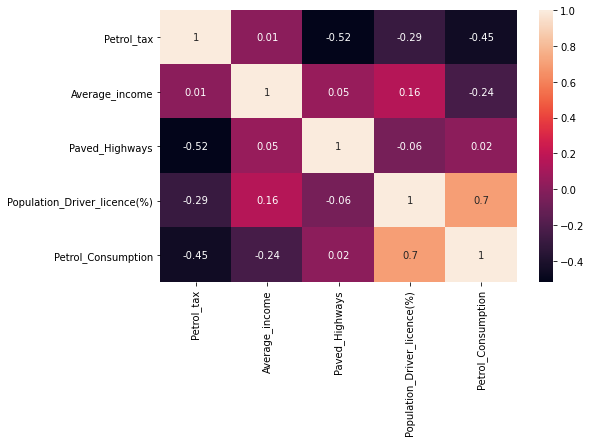

In [36]:
corr_matrix=df.corr().round(2)

plt.figure(figsize=(8,5))
sns.heatmap(data=corr_matrix, annot=True)
plt.show()


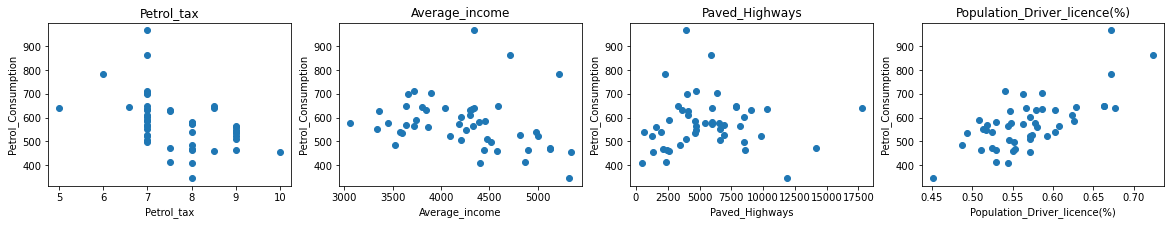

In [37]:
features =['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']
target = 'Petrol_Consumption'
plt.figure(figsize=(20,3))
for i, col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x = df[col]
    y = df[target]
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel(target)


In [38]:
X = df[features].values
y = df[target].values
print(X[:5])
print(y[:5])


[[9.000e+00 3.571e+03 1.976e+03 5.250e-01]
 [9.000e+00 4.092e+03 1.250e+03 5.720e-01]
 [9.000e+00 3.865e+03 1.586e+03 5.800e-01]
 [7.500e+00 4.870e+03 2.351e+03 5.290e-01]
 [8.000e+00 4.399e+03 4.310e+02 5.440e-01]]
[541 524 561 414 410]


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10 )

print(X_train.shape)
print(X_test.shape)


(38, 4)
(10, 4)


In [40]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

pd.DataFrame(model.coef_, features, columns=['Coefficient'])

421.12134435504913
[-4.65293922e+01 -6.44838118e-02 -4.77673281e-03  1.43450684e+03]


,Coefficient
Petrol_tax,-46.529392
Average_income,-0.064484
Paved_Highways,-0.004777
Population_Driver_licence(%),1434.506838


In [41]:
y_predict = model.predict(X_test)

# print(y_test)
# print(y_predict)
pd.DataFrame({'Actual Petrol_Consumption':y_test, 'Predict Petrol_Consumption':y_predict})

,Actual Petrol_Consumption,Predict Petrol_Consumption
0,644,734.674368
1,547,447.041010
2,632,665.779408
3,587,684.369138
4,510,514.000797
5,649,712.898561
6,414,505.738758
7,571,570.785726
8,467,501.411815
9,344,296.169131


In [42]:
from sklearn import metrics
print('Mean Squared Error (MSE):',metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error (RMSE):',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('Mean Absolute Error (MAE):',metrics.mean_absolute_error(y_test,y_predict))


Mean Squared Error (MSE): 4482.248127333782
Root Mean Squared Error (RMSE): 66.949593929566
Mean Absolute Error (MAE): 56.38769773511666
